In [1]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score


In [2]:
InteractiveShell.ast_node_interactivity = "all"


In [3]:
# Design

# Sizes

title_size = 50
tick_size = 30
text_size = 30


In [4]:
# Functions


def cuts_the_data(time, dataframe, columns):

    """Return a copy of a dataframe with samples below a given date"""

    return dataframe[
                dataframe['order_purchase_timestamp_min'] < time][columns]\
        .copy()


In [5]:
# Imports dataframe

cleaned_df = \
    pd.read_csv(r'F:\Data\Projet 5\Livrables\cleaned_data')


# Seed for random states

seed = 34


In [6]:
# RFM TAE + order_purchase_timestamp_min

stability_columns = [
    'Recency',
    'Monetary_Mean',
    'Satisfaction',
    'Timing',
    'Basket',
    'Event',
    'order_purchase_timestamp_min']

X = cleaned_df[stability_columns].copy()

X.head()


,Recency,Monetary_Mean,Satisfaction,Timing,Basket,Event,order_purchase_timestamp_min
0,-1426,141.90,5.0,-5.0,1.0,58.294444,2018-05-10 10:56:27
1,-1429,27.19,4.0,-5.0,1.0,144.738889,2018-05-07 11:11:27
2,-1852,86.22,3.0,-2.0,1.0,14.466667,2017-03-10 21:05:03
3,-1636,43.62,4.0,-12.0,1.0,-28.505556,2017-10-12 20:29:41
4,-1603,196.89,5.0,-8.0,1.0,-4.516667,2017-11-14 19:45:42


<center><h6>Method

    Method : 
    
    One might ask oneself "what if the mission was given with the same data 6 months 
    ago ?" to have a fair idea of how the clusters would have evolved in time. 
    
    NB : the choice of six months is arbitrary, one could have chosen another time 
    range. Note however that six months allows to have a good amount of data to fit 
    a more recent and informed model (and consequently replicate more accurately the 
    actual delivered model). If the model was stable in this range, one could have 
    extended it but this isn't the case here (then it isn't useful to do so here).   
    
    As if the mission was 6 months ago, a fitted model will be computed 
    (false delivered model)
    Then, each month a more up to date model will be fitted (supposed values model)
    
    The delivered model will then predict the clusters of the data at a given time 
    (initial data + n months data) and the supposed values model will too.
    
    Confronting the two models results through ARI will give an idea on the 
    similarity of the results of the two models and therefore of the stability in 
    time of our model. 
    
    Through 2 iteration, the data will get closer to the actual delivery date 
    (because the stability allows it -- it drops in the 6 months) and the maintenance
    recommended date will be more accurate as the second iteration will replicate the 
    above method but each two weeks.
    
    NB : The standard scaler has to be computed with its relative model as one could 
    consider such a transformation as a 'dependant' of the given data one (nor the
    mean, nor the standard deviation would be the same accoring to the given data)

<center><h6>'Independant' data transformations

    Same transformations as RMS TBE but not standard scaled as the stadndardisation
    is 'dependant' to the data itself

In [7]:
# Reciproqual transformation for left skewed distributions

# NB : when applying reciproqual transformation, datas are first inverted
# This cancell the inversion caused by recriproqual transformation

X['Recency'] = 1/(-X[['Recency']])
X['Satisfaction'] = 1/(X[['Satisfaction']]).apply(lambda x: 6 - x)

# Logarithmic transformation for right skewed distributions

X[['Basket', 'Monetary_Mean']] = np.log1p(X[['Basket', 'Monetary_Mean']])


<center><h6>6 Months stability

In [8]:
# Displays the maximum date of the data

# Six months ago was 2018-02 as the data goes until the end of August

pd.to_datetime(X['order_purchase_timestamp_min'])\
    .describe(datetime_is_numeric=True)['max']


Timestamp('2018-08-29 15:00:37')

In [9]:
# Six months ago

# Computes the data as if the mission was 6 months ago

data_6_months = cuts_the_data('2018-03', X, X.iloc[:, :6].columns)

# Following Months Cuts

data_5_months = cuts_the_data('2018-04', X, X.iloc[:, :6].columns)
data_4_months = cuts_the_data('2018-05', X, X.iloc[:, :6].columns)
data_3_months = cuts_the_data('2018-06', X, X.iloc[:, :6].columns)
data_2_months = cuts_the_data('2018-07', X, X.iloc[:, :6].columns)
data_1_months = cuts_the_data('2018-08', X, X.iloc[:, :6].columns)
data_0_months = cuts_the_data('2018-09', X, X.iloc[:, :6].columns)


In [10]:
# 6 months ago the data would have been delivered as such :

# Computes the standard scaler as if the mission was 6 months ago

std_6_months = StandardScaler().fit(data_6_months)

# Transform the data with the 6 months standard scaler

data_6_months_std_6_months = std_6_months.transform(data_6_months)

# Following Months Cuts 6 months standardised

data_5_months_std_6_months = std_6_months.transform(data_5_months)
data_4_months_std_6_months = std_6_months.transform(data_4_months)
data_3_months_std_6_months = std_6_months.transform(data_3_months)
data_2_months_std_6_months = std_6_months.transform(data_2_months)
data_1_months_std_6_months = std_6_months.transform(data_1_months)
data_0_months_std_6_months = std_6_months.transform(data_0_months)

# Fit the model as if the mission was 6 months ago

model_6_months = \
    KMeans(n_clusters=8, random_state=seed).fit(data_6_months_std_6_months)

# Following Months if the model was fitted 6 months ago

model_6_plus_5_months_predicted = model_6_months\
                                    .predict(data_5_months_std_6_months)
model_6_plus_4_months_predicted = model_6_months\
                                    .predict(data_4_months_std_6_months)
model_6_plus_3_months_predicted = model_6_months\
                                    .predict(data_3_months_std_6_months)
model_6_plus_2_months_predicted = model_6_months\
                                    .predict(data_2_months_std_6_months)
model_6_plus_1_months_predicted = model_6_months\
                                    .predict(data_1_months_std_6_months)
model_6_plus_0_months_predicted = model_6_months\
                                    .predict(data_0_months_std_6_months)


In [11]:
# The supposed actual evolution of following months models :

# Following Months Cuts supposed standardisation

data_5_months_supposed_std = StandardScaler().fit_transform(data_5_months)
data_4_months_supposed_std = StandardScaler().fit_transform(data_4_months)
data_3_months_supposed_std = StandardScaler().fit_transform(data_3_months)
data_2_months_supposed_std = StandardScaler().fit_transform(data_2_months)
data_1_months_supposed_std = StandardScaler().fit_transform(data_1_months)
data_0_months_supposed_std = StandardScaler().fit_transform(data_0_months)

# Following Months supposed models predicted

model_5_months_predicted = KMeans(n_clusters=8, random_state=seed)\
                            .fit_predict(data_5_months_supposed_std)
model_4_months_predicted = KMeans(n_clusters=8, random_state=seed)\
                            .fit_predict(data_4_months_supposed_std)
model_3_months_predicted = KMeans(n_clusters=8, random_state=seed)\
                            .fit_predict(data_3_months_supposed_std)
model_2_months_predicted = KMeans(n_clusters=8, random_state=seed)\
                            .fit_predict(data_2_months_supposed_std)
model_1_months_predicted = KMeans(n_clusters=8, random_state=seed)\
                            .fit_predict(data_1_months_supposed_std)
model_0_months_predicted = KMeans(n_clusters=8, random_state=seed)\
                            .fit_predict(data_0_months_supposed_std)


In [12]:
# Compares the 6 months delivered to the supposed actual models

ari_1 = adjusted_rand_score(model_6_plus_5_months_predicted,
                            model_5_months_predicted)
ari_2 = adjusted_rand_score(model_6_plus_4_months_predicted,
                            model_4_months_predicted)
ari_3 = adjusted_rand_score(model_6_plus_3_months_predicted,
                            model_3_months_predicted)
ari_4 = adjusted_rand_score(model_6_plus_2_months_predicted,
                            model_2_months_predicted)
ari_5 = adjusted_rand_score(model_6_plus_1_months_predicted,
                            model_1_months_predicted)
ari_6 = adjusted_rand_score(model_6_plus_0_months_predicted,
                            model_0_months_predicted)

ari_df = pd.DataFrame([ari_1, ari_2, ari_3, ari_4, ari_5, ari_6],
                      columns=['ari'])

ari_df


,ari
0,0.887318
1,0.820257
2,0.754233
3,0.693361
4,0.607573
5,0.554849


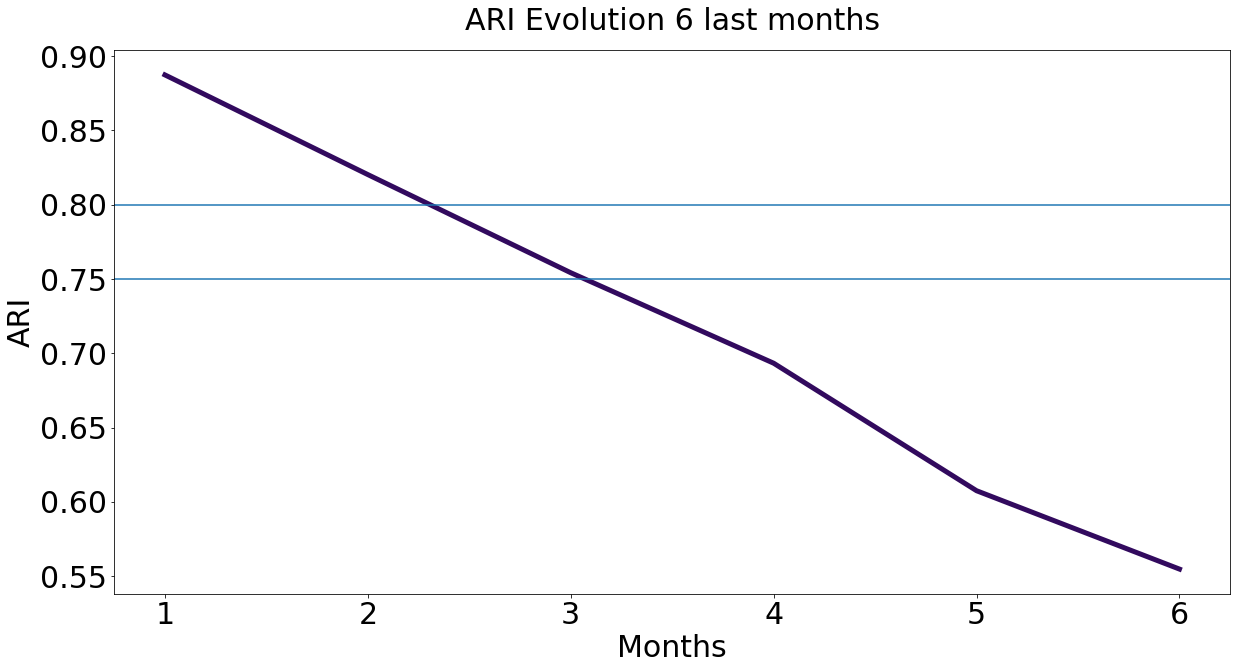

In [13]:
# Plots the six months ARI

fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(data=ari_df,
             y='ari',
             x=ari_df.index,
             color=sns.color_palette('inferno_r', 5)[4],
             ax=ax,
             lw=5)

ax.set_xticks(range(0, 6))
ax.set_xticklabels(range(1, 7))
ax.tick_params(labelsize=tick_size)
ax.set_xlabel('Months', fontsize=text_size)
ax.set_ylabel('ARI', fontsize=text_size)
ax.axhline(0.75)
ax.axhline(0.80)

plt.title('ARI Evolution 6 last months', pad=20, fontsize=text_size)

plt.show();


    An iteration will be done with 3 months as the ARI seems to go under [0.8;0.75] 
    in this period 

<center><h6>3 Months stability

In [14]:
# Three months ago

# Computes the data as if the mission was 3 months ago

second_data_3_months = cuts_the_data('2018-06-01', X, X.iloc[:, :6].columns)

# Following Months Cuts

second_data_2_5_months = cuts_the_data('2018-07-15', X, X.iloc[:, :6].columns)
second_data_2_months = cuts_the_data('2018-07-01', X, X.iloc[:, :6].columns)
second_data_1_5_months = cuts_the_data('2018-08-15', X, X.iloc[:, :6].columns)
second_data_1_months = cuts_the_data('2018-08-01', X, X.iloc[:, :6].columns)
second_data_0_5_months = cuts_the_data('2018-08-15', X, X.iloc[:, :6].columns)
second_data_0_months = cuts_the_data('2018-09-01', X, X.iloc[:, :6].columns)


In [15]:
# 3 months ago the data would have been delivered as such :

# Computes the standard scaler as if the mission was 3 months ago

std_3_months = StandardScaler().fit(second_data_3_months)

# Transform the data with the 6 months standard scaler

data_3_months_std_3_months = std_3_months.transform(second_data_3_months)

# Following Months Cuts 3 months standardised

second_data_2_5_months_std_3_months = \
    std_3_months.transform(second_data_2_5_months)
second_data_2_months_std_3_months = \
    std_3_months.transform(second_data_2_months)
second_data_1_5_months_std_3_months = \
    std_3_months.transform(second_data_1_5_months)
second_data_1_months_std_3_months = \
    std_3_months.transform(second_data_1_months)
second_data_0_5_months_std_3_months = \
    std_3_months.transform(second_data_0_5_months)
second_data_0_months_std_3_months = \
    std_3_months.transform(second_data_0_months)

# Fit the model as if the mission was 3 months ago

model_3_months = \
    KMeans(n_clusters=8, random_state=seed).fit(data_3_months_std_3_months)

# Following Months if the model was fitted 3 months ago

model_3_plus_2_5_months_predicted = \
    model_3_months.predict(second_data_2_5_months_std_3_months)
model_3_plus_2_months_predicted = \
    model_3_months.predict(second_data_2_months_std_3_months)
model_3_plus_1_5_months_predicted = \
    model_3_months.predict(second_data_1_5_months_std_3_months)
model_3_plus_1_months_predicted = \
    model_3_months.predict(second_data_1_months_std_3_months)
model_3_plus_0_5_months_predicted = \
    model_3_months.predict(second_data_0_5_months_std_3_months)
model_3_plus_0_months_predicted = \
    model_3_months.predict(second_data_0_months_std_3_months)


In [16]:
# The supposed actual evolution of following months models :

# Following Months Cuts supposed standardisation

second_data_2_5_months_supposed_std = \
    StandardScaler().fit_transform(second_data_2_5_months)
second_data_2_months_supposed_std = \
    StandardScaler().fit_transform(second_data_2_months)
second_data_1_5_months_supposed_std = \
    StandardScaler().fit_transform(second_data_1_5_months)
second_data_1_months_supposed_std = \
    StandardScaler().fit_transform(second_data_1_months)
second_data_0_5_months_supposed_std = \
    StandardScaler().fit_transform(second_data_0_5_months)
second_data_0_months_supposed_std = \
    StandardScaler().fit_transform(second_data_0_months)

# Following Months supposed models predicted

second_model_2_5_months_predicted = \
    KMeans(n_clusters=8, random_state=seed)\
    .fit_predict(second_data_2_5_months_supposed_std)
second_model_2_months_predicted = \
    KMeans(n_clusters=8, random_state=seed)\
    .fit_predict(second_data_2_months_supposed_std)
second_model_1_5_months_predicted = \
    KMeans(n_clusters=8, random_state=seed)\
    .fit_predict(second_data_1_5_months_supposed_std)
second_model_1_months_predicted = \
    KMeans(n_clusters=8, random_state=seed)\
    .fit_predict(second_data_1_months_supposed_std)
second_model_0_5_months_predicted = \
    KMeans(n_clusters=8, random_state=seed)\
    .fit_predict(second_data_0_5_months_supposed_std)
second_model_0_months_predicted = \
    KMeans(n_clusters=8, random_state=seed)\
    .fit_predict(second_data_0_months_supposed_std)


In [17]:
# Compares the 3 months delivered to the supposed actual models

second_ari_1 = adjusted_rand_score(model_3_plus_2_5_months_predicted,
                                   second_model_2_5_months_predicted)
second_ari_2 = adjusted_rand_score(model_3_plus_2_months_predicted,
                                   second_model_2_months_predicted)
second_ari_3 = adjusted_rand_score(model_3_plus_1_5_months_predicted,
                                   second_model_1_5_months_predicted)
second_ari_4 = adjusted_rand_score(model_3_plus_1_months_predicted,
                                   second_model_1_months_predicted)
second_ari_5 = adjusted_rand_score(model_3_plus_0_5_months_predicted,
                                   second_model_0_5_months_predicted)
second_ari_6 = adjusted_rand_score(model_3_plus_0_months_predicted,
                                   second_model_0_months_predicted)

second_ari_df = pd.DataFrame([second_ari_1, second_ari_2, second_ari_3,
                             second_ari_4, second_ari_5, second_ari_6],
                             columns=['ari'])

second_ari_df


,ari
0,0.848514
1,0.882734
2,0.774956
3,0.813011
4,0.774956
5,0.755429


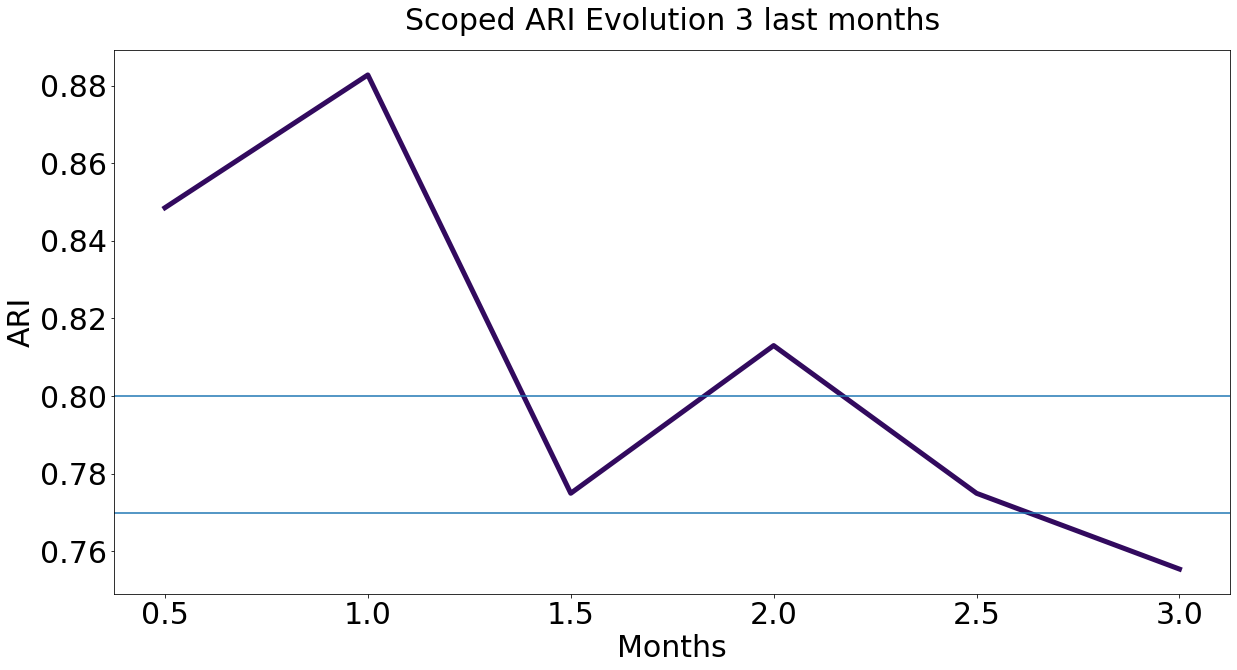

In [18]:
# Plots the three months ARI

fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=second_ari_df,
             y='ari',
             x=second_ari_df.index,
             color=sns.color_palette('inferno_r', 5)[4],
             ax=ax,
             lw=5)

ax.set_xticks(range(0, 6))
ax.set_xticklabels(np.linspace(0, 2.5, 6) + 0.5)
ax.tick_params(labelsize=tick_size)
ax.axhline(0.80)
ax.axhline(0.77)

plt.title('Scoped ARI Evolution 3 last months', pad=20, fontsize=text_size)

ax.set_xlabel('Months', fontsize=text_size)
ax.set_ylabel('ARI', fontsize=text_size)

plt.show();
